<a href="https://colab.research.google.com/github/hmm0403/TIL/blob/main/reg_%EC%98%A8%EC%8A%B5_%EC%97%B4%EB%A7%A4%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd
df = pd.read_csv("jun_gwang_tomato_netdb4.csv")
df.head()

,시설ID,시도,시군구,품목명,품종,재배면적,시설유형,재배형태,단동/연동 구분,수집일,...,생장길이,화방높이,줄기직경,엽장,엽폭,엽수,개화군,착과군,열매수,최종화방차수
0,PF_0020968_01,전라북도,임실군,토마토,NaN,"1,000",NaN,NaN,NaN,2021-02-04 23:00,...,15.0,18.0,9.0,34,68,16.0,1.0,4.0,14,0.0
1,PF_0020968_01,전라북도,임실군,토마토,NaN,"1,000",NaN,NaN,NaN,2021-02-10 23:00,...,17.0,6.0,7.0,30,60,17.0,1.0,4.0,17,NaN
2,PF_0020968_01,전라북도,임실군,토마토,NaN,"1,000",NaN,NaN,NaN,2021-02-20 23:00,...,22.0,9.0,8.0,31,62,14.0,1.0,NaN,15,NaN
3,PF_0020968_01,전라북도,임실군,토마토,NaN,"1,000",NaN,NaN,NaN,2021-02-25 16:00,...,12.0,3.0,9.0,29,d,14.0,1.0,4.0,15,NaN
4,PF_0020968_01,전라북도,임실군,토마토,NaN,"1,000",NaN,NaN,NaN,2021-03-04 23:00,...,16.0,8.0,9.0,29,58,11.0,1.0,3.0,14,NaN


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   시설ID      59 non-null     object 
 1   시도        59 non-null     object 
 2   시군구       59 non-null     object 
 3   품목명       59 non-null     object 
 4   품종        20 non-null     object 
 5   재배면적      59 non-null     object 
 6   시설유형      38 non-null     object 
 7   재배형태      38 non-null     object 
 8   단동/연동 구분  38 non-null     object 
 9   수집일       59 non-null     object 
 10  조사일       59 non-null     object 
 11  주차        59 non-null     object 
 12  내부온도      59 non-null     float64
 13  내부습도      59 non-null     float64
 14  내부CO2     41 non-null     float64
 15  생장길이      28 non-null     float64
 16  화방높이      46 non-null     float64
 17  줄기직경      59 non-null     float64
 18  엽장        59 non-null     int64  
 19  엽폭        59 non-null     object 
 20  엽수        46 non-null     float64


In [45]:
from sklearn.model_selection import train_test_split
x = df[['내부온도','내부습도']]
y = df[['열매수']]
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train, y_train) 

LinearRegression()

In [48]:
my_apartment = [[1,1]]
my_predict = mlr.predict(my_apartment)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [49]:
y_predict = mlr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50676 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

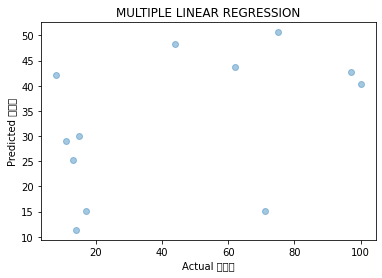

In [51]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual 열매수")
plt.ylabel("Predicted 열매수")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [52]:
print(mlr.coef_)
print('가중치 a : ', mlr.coef_)
print('y절편 : ', mlr.intercept_)

[[-3.11389459  0.21610515]]
가중치 a :  [[-3.11389459  0.21610515]]
y절편 :  [82.63870603]


In [53]:
#결정계수
relation_square = mlr.score(x, y)
print('결정계수 : ', relation_square)

결정계수 :  0.10006741615719805


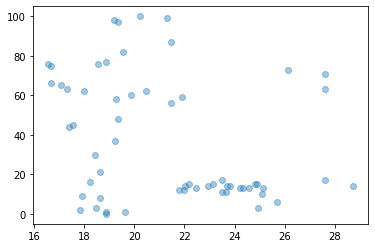

In [57]:
plt.scatter(df[['내부온도']], df[['열매수']], alpha=0.4)
plt.show()

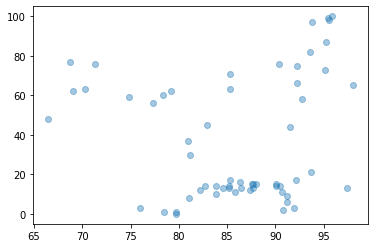

In [58]:
plt.scatter(df[['내부습도']], df[['열매수']], alpha=0.4)
plt.show()

In [59]:
((y - y.mean()) ** 2).sum()

열매수    56894.983051
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


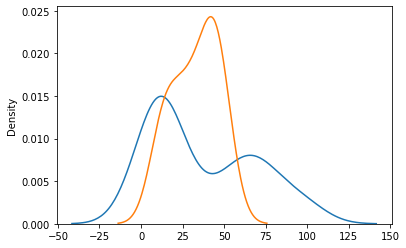

In [60]:

import matplotlib.pyplot as plot
import seaborn as sns
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(y_predict, hist = False, label = 'y예측')
plot.show()